# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [5]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Feature_Sample_size\\"
Add_on_path = "\\Results\\Sample_size_Sto_Feature\\"

current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [6]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
print(df_RT_Profit)

         f1_d4_upd46_t47  f1_d2_upd69_t70  f1_d7_upd43_t44  f1_d5_upd33_t34   
sto            -2.430626      3228.069679      1157.289724        -0.040863  \
det          -333.291076      2800.639464       425.875299      -363.874009   
oracle       3401.127559      4065.967751      3497.548505      3808.381413   
feature         0.298141      3272.915046       580.491932        -7.271930   
rule         -520.349964      1311.458911       463.340219       433.041444   

         f1_d5_upd74_t75  f1_d4_upd21_t22  f1_d9_upd7_t8  f1_d9_upd0_t1   
sto           618.592664      1677.005989    2647.148489     332.394654  \
det          -217.248439      2564.504121    2759.811124     141.739045   
oracle       4221.746854      5609.734256    8188.482024    8879.870771   
feature       602.597238      1385.854867    2516.765912     -13.953004   
rule          945.087901       577.431366    1430.005190    1330.520120   

         f1_d11_upd13_t14  f1_d4_upd55_t56  ...  f1_d11_upd49_t50   
sto  

In [7]:

SampleSizes = [2,5,10,20,40,80,160,320,365]
SampleSizes = [2,4,5,7,9,11]
forecast = [1]
visualize_forecasts = True
xtick_names = forecast
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=1, SampleSizes=SampleSizes)
#print(Array)

In [11]:

def plot_profit_Test(Array, PlotCase, Forecast_selection, SampleSize_selection, barwidth = 0.1, Forecast_label = [1,2,3], SampleSize_label = [2,4,5,7,9,11],ShowEachTestDay = False,save = False,Model = ['Rule', 'Deterministic', 'Stochastic', 'Feature','Oracle'],colors = ['C3', 'C0', 'C2', 'C1'],Profit = ['Expected', 'Realized'],legend_plot = True):

    # Sample data
    #Array = np.random.rand(3, 6, 88, 5, 2)
    # PlotCase = 'Forecast' , 'Sample Size', ''
    #Forecast_names = [1,2,3]
    #SampleSize_names = [2,5,7,9,11]
    


    #colors = ['C3', 'C0', 'C2', 'C1']  # Colors for the fourth dimension
    #Model = ['Rule', 'Deterministic', 'Stochastic', 'Feature']
    Model_fix = ['Rule', 'Deterministic', 'Stochastic', 'Feature']
    
    mean_values = np.mean(Array, axis=2)
    std_values = np.std(Array, axis=2)

    if PlotCase == 'Forecasts':
        x_axis_label = 'Forecasts'
        x_axis = np.arange(len(Forecast_selection))
        xtick_names = Forecast_label
        bar_count = (Array.shape[3]-1) * Array.shape[4]  # Number of bars in each group (5-1)*2
        

    elif  PlotCase == 'Sample size':
        x_axis_label = 'Sample size'
        x_axis = np.arange(len(SampleSize_selection))
        xtick_names = SampleSize_label
        #
        if Model == ['Rule', 'Deterministic', 'Stochastic', 'Feature']:
            colors = ['C2', 'C1']  # Colors for the fourth dimension
            Model_mod = ['Sto', 'Feature']
            s_m_idx = [i for i, m in enumerate(Model_fix) if m in Model]
            bar_count = (len(Model_mod)) * Array.shape[4]  # Number of bars in each group (5-1)*2
        else:
            s_m_idx = [i for i, m in enumerate(Model_fix) if m in Model]
            bar_count = (len(Model)) * Array.shape[4]  # Number of bars in each group (5-1)*2

    else:
        x_axis_label = '' 
        
        xtick_names = 'off'
        Forecastidx = 1 # [1,2,3]
        x_axis = [Forecastidx]
        bar_count = (Array.shape[3]-1) * Array.shape[4]  # Number of bars in each group (5-1)*2

        
    

    # Fixed settings
    #ax.set_ylabel('\u20AC/day')
    y_axis_label = 'Profit [\u20AC/day]'
    test_days = np.arange(Array.shape[2])


    legend_labels = Model
    legend_colors = colors
    linestyle = '-'
    linecolor = 'C4'
    linelabel = 'Oracle'
    edgecolor = "black"
    fill_patterns_label = ['Expected', 'Realized']  # Fill patterns for the fifth dimension
    fill_patterns = ['', '\\']  # Fill patterns for the fifth dimension


    profit_idx = np.where(np.array(Profit) == fill_patterns_label)[0]
    selected_fill_patterns = [fill_patterns[i] for i in profit_idx]



    # /   - diagonal hatching
    # \   - back diagonal
    # |   - vertical
    # -   - horizontal
    # +   - crossed
    # x   - crossed diagonal
    # o   - small circle
    # O   - large circle
    # .   - dots
    # *   - stars


    linewidth = 4
    
 

    #bar_list = [-(barwidth * bar_count / 2) + i * barwidth for i in range(bar_count)]
    bar_list = [i*0 for i in range(bar_count)]
    spacing = barwidth/10
    for i in range(bar_count):
        if i == 0:
            bar_list[i] = -(barwidth * bar_count / 2) + i * barwidth
        else:
            bar_list[i] = bar_list[i-1] + barwidth
        
        if i % 2 == 0:
            bar_list[i] = bar_list[i] + spacing
            
            
        
    size_around_tick = barwidth * bar_count / 2 + barwidth/2   

    # Compute the means along the third dimension



    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Plot value of the oracle model
    #mean_value = np.mean(Array[Forecast_selection, SampleSize_selection, :, 4, 1])
    #lines = ax.hlines(mean_value, 0 - size_around_tick + 4 *spacing, len(x_axis) - 1 + size_around_tick, color=linecolor, linestyle=linestyle, linewidth=linewidth)


    for f,forecast  in enumerate(Forecast_selection):

        for s,sample  in enumerate(SampleSize_selection):
            count_j = 0
            count_k = 0
            for j, color in enumerate(colors):
                for k, fill_pattern in enumerate(selected_fill_patterns):
                    # construct where on the x axis the bar is located

                    # To get a little bit of spacing after each model
                    

                    if PlotCase == 'forecast':
                        
                        bar_left = f + bar_list[count_k]


                        j_mod = j
                    elif PlotCase == 'Sample size [d]':
                        bar_left = s + bar_list[count_k]
                        j_mod = s_m_idx[j] # Just so only specified models are showed
                        k_mod = profit_idx[k]
                    else:

                        bar_left = bar_list[count_k]
                        j_mod = j
                        k_mod = profit_idx[k]


                    
                    # Define the height of the bar
                    bar_height = mean_values[forecast,sample,j_mod,k_mod]
                    error_value = std_values[forecast,sample,j_mod,k_mod]

                    

                    ax.bar(bar_left, bar_height, width=barwidth, color=color, hatch=fill_pattern, align='edge', edgecolor=edgecolor)

                    x_position = bar_left + barwidth/2
                    ax.errorbar(x_position, bar_height, yerr=error_value, fmt='none', ecolor='black', capsize=4)

                    if ShowEachTestDay == True:
                        for d,val in enumerate(test_days):
                            #print("(",bar_left,",",Array[x,2,d,j,k],")")
                            
                            ax.scatter(x_position,Array[forecast,sample,d,j,k],s=2, edgecolor=edgecolor, color=color)

                    count_k = count_k + 1
                count_j = count_j + 1




    # Set the x-axis ticks and tick labels
    
    if xtick_names != 'off':
        ax.set_xticks(x_axis)
        ax.set_xticklabels(xtick_names)
        ax.set_xlabel(x_axis_label)
    else:
        # Remove x axis
            
        #ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_xlabel('')

    # Set the y-axis tick size
    ax.tick_params(axis='y', which='major', labelsize=20)
    
    ax.set_ylabel(y_axis_label, fontsize=14, labelpad=10)
    ax.yaxis.set_tick_params(labelsize=10)

    if legend_plot == True:
        # Create legend for the bars
        legend_handles = []

        for label, color in zip(legend_labels, legend_colors):
            rect = plt.Rectangle((0, 0), 1, 1, color=color, label=label)
            rect.set_edgecolor(edgecolor)
            legend_handles.append(rect)



        for label, pattern in zip(fill_patterns_label, fill_patterns): 
            legend_handles.append(plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor=edgecolor,  hatch=pattern, label=label))

        # Create legend for the horizontal line
        legend_handles.append(plt.Line2D([0], [0], color=linecolor, linestyle=linestyle, label=linelabel,linewidth=linewidth))

        # Show the legend
        ax.legend(handles=legend_handles,bbox_to_anchor=(1.02, 0.9), loc='upper left')


    if save == True:
        plt.savefig(f'Result_plots/Profit_Bar_plot.pdf',format="pdf", bbox_inches='tight')
    # Show the plot
    plt.show()

In [8]:
import numpy as np

Profit = ["Realized", "Expected"]
fill_patterns_label = ["Realized", "Expected"]

s_m_idx = np.where(np.array(Profit) == fill_patterns_label)[0]
print(s_m_idx)

fill_patterns = ['', '\\']
selected_fill_patterns = [fill_patterns[i] for i in s_m_idx]
print(selected_fill_patterns)


[0 1]
['', '\\']


With perfect forecast

IndexError: index 1 is out of bounds for axis 0 with size 1

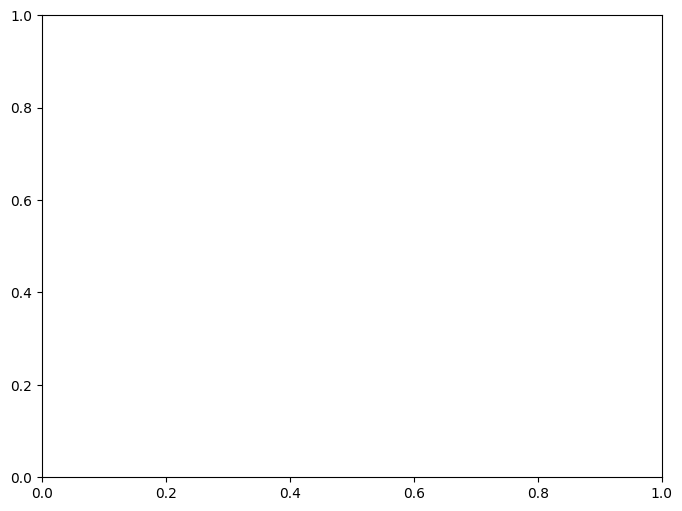

In [14]:
forecast = [1,2,3]
SampleSizes = [2,4,5,7,9,11]

plot_profit_Test(Array,'Sample size', [1], [0,1,2,3,4,5], SampleSize_label = SampleSizes ,barwidth = 0.5,  ShowEachTestDay = False, Model = ["Sto","Feature"],colors=['C2', 'C1'],Profit=["Realized"],legend_plot = True)

In [9]:
forecast = [1,2,3]
SampleSize = [2,5,10,20,40,80,160,320,365]

plot_profit_Test(Array,'Sample size', [1], [0,1,2,3,4,5,6,7,8], SampleSize_label = SampleSize ,barwidth = 0.5,  ShowEachTestDay = False, Model = ["Feature"],colors=["C1"],Profit=["Realized"],legend_plot = True)

TypeError: plot_profit_Test() got an unexpected keyword argument 'Model'

For a fixed training size, see how the different days affects the results

In [21]:
fixd5 = [f'f{2}_d{365}_upd{d}_t{d+1}' for d in range(0,88)]

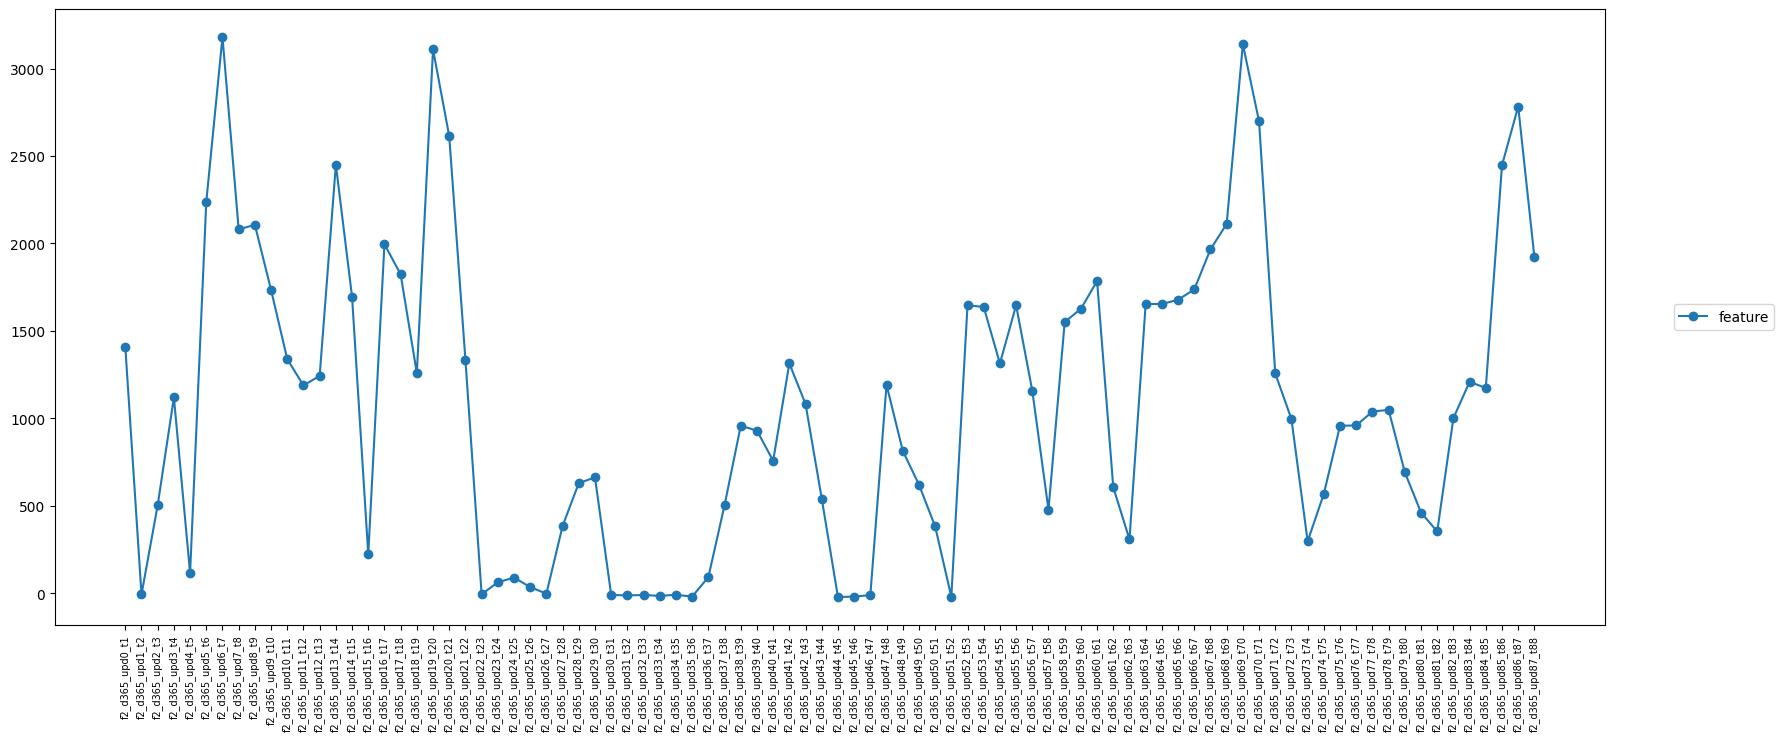

In [22]:
data = df_RT_Profit[fixd5].T
models = ['feature']
plot = data[models]
plt.figure(figsize=(20,8))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [39]:
mean_values = np.mean(Array, axis=2)
std_values = np.std(Array, axis=2)

In [52]:
mean_values[0,:,3,:]

array([[3108.08023819, 4431.48322122],
       [3094.62466821, 4369.43595672],
       [3074.1863324 , 4422.37511265],
       [3039.54821182, 4423.27891274],
       [2997.92067321, 4089.3766647 ],
       [3020.63701107, 3818.81461895],
       [3048.50954396, 3798.66258083],
       [3108.99196025, 3776.88297173],
       [3120.69232247, 3777.68462856]])